## Your Name: Akash Dwivedi
## Your NetID: Akd19001
## Due: Friday, April 3, 2020, 11:59pm

# Scrape tweets and save as txt files

In [0]:
pip install getoldtweets3

In [0]:
import GetOldTweets3 as got
def scrape_tweets(username):
  username = username
  count = 2000
  # Creation of query object
  tweetCriteria = got.manager.TweetCriteria().setUsername(username)\
                                          .setMaxTweets(count)
  # Creation of list that contains all tweets
  tweets = got.manager.TweetManager.getTweets(tweetCriteria)
  # Creating list of chosen tweet data
  user_tweets = [[tweet.text] for tweet in tweets]
  return user_tweets

In [0]:
# Use above function to return tweets of Trump and Obama.
# If there is certificate error, try again at another time, maybe several minutes later.
# Your code here:

Tweet_Donald = scrape_tweets('realDonaldTrump')
Tweet_Obama = scrape_tweets('BarackObama')


In [1]:
from google.colab import drive, files
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# Save all tweets to two folders
# Update the code with your own variables and paths.
# The resulted files will be in two folders just like IMDB data.
for i in range(0,len(Tweet_Donald)):
  path='/content/drive/My Drive/Deep_Learning_Dave/W4/Assignment/Trump/trump'+str(i)+'.txt'
  with open(path, "w") as output:
    output.write(str(Tweet_Donald[i]))
i = 0
for i in range(0,len(Tweet_Obama)):
  path='/content/drive/My Drive/Deep_Learning_Dave/W4/Assignment/Obama/obama'+str(i)+'.txt'
  with open(path, "w") as output:
    output.write(str(Tweet_Obama[i]))

# Loading data and prepare data for modeling

In [2]:
#Load the data you just saved from your drive

import os

Tweet_dir = '/content/drive/My Drive/Deep_Learning_Dave/W4/Assignment'

labels = []
texts = []
count = 0
for label_type in ['Trump/', 'Obama/']:
    dir_name = os.path.join(Tweet_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            count = count + 1
            print(count)
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'Trump/': #Trump tweets as 0
                labels.append(0)
            else:
                labels.append(1)       #Obama tweets as 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [3]:
# Tokenize, pad and prepare training and validation data
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 2500  # We will be training on 200 samples
validation_samples = 1500  # We will be validating on 10000 samples
max_words = 2000  # We will only consider the top 10,000 words in the dataset

Using TensorFlow backend.


In [4]:
# link: https://keras.io/preprocessing/text/
# has good details on what a tokenizer does

# This class allows to vectorize a text corpus, by turning each text into either a sequence of integers
# omits common characters 
tokenizer = Tokenizer(num_words=max_words)

# fit_on_texts means it learns the indices of the words
tokenizer.fit_on_texts(texts)

# the sequences are comprised of those indices
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# in case of low word counts, we need to pad sequences
# so that they are uniform length
data = pad_sequences(sequences, maxlen=maxlen)

# our labels, which were previously stored as a list [],
# are now converted to a numpy array for modeling
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 10174 unique tokens.
Shape of data tensor: (4000, 100)
Shape of label tensor: (4000,)


In [0]:
# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] 
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

# Modeling: Fit three models with different architecture
embedding Preprocessing

In [10]:
glove_dir = '/content/drive/My Drive/Deep_Learning_Dave/W4/Assignment/glove.6B/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
embedding_dim = 100 # this is the dimension of the file we imported
# could use 50, but need to make sure you 

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

## Model 1

In [47]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(250, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          200000    
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               2500250   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 251       
Total params: 2,700,501
Trainable params: 2,700,501
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Load GLove Embedding in the model
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


In [49]:
#Train and Evaluate
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model1.h5')

Epoch 1/50
79/79 [==============================] - 2s 29ms/step - loss: 0.3740 - acc: 0.8420 - val_loss: 0.4631 - val_acc: 0.8447
Epoch 2/50
79/79 [==============================] - 2s 29ms/step - loss: 0.2213 - acc: 0.9100 - val_loss: 0.2903 - val_acc: 0.8753
Epoch 3/50
79/79 [==============================] - 2s 29ms/step - loss: 0.1318 - acc: 0.9476 - val_loss: 0.3321 - val_acc: 0.8653
Epoch 4/50
79/79 [==============================] - 2s 29ms/step - loss: 0.0870 - acc: 0.9708 - val_loss: 0.3618 - val_acc: 0.8660
Epoch 5/50
79/79 [==============================] - 2s 29ms/step - loss: 0.0523 - acc: 0.9856 - val_loss: 0.4455 - val_acc: 0.8733
Epoch 6/50
79/79 [==============================] - 2s 29ms/step - loss: 0.0376 - acc: 0.9896 - val_loss: 0.4709 - val_acc: 0.8793
Epoch 7/50
79/79 [==============================] - 2s 29ms/step - loss: 0.0319 - acc: 0.9904 - val_loss: 0.4987 - val_acc: 0.8787
Epoch 8/50
79/79 [==============================] - 2s 29ms/step - loss: 0.0204 - a

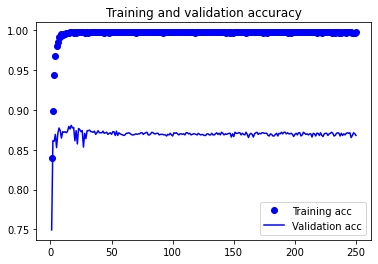

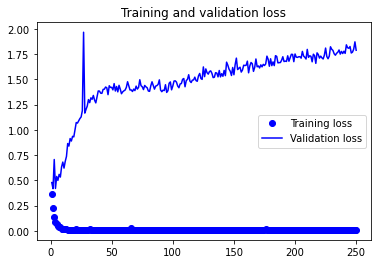

In [29]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#This shows that running for under 50 epoch is fine. Note that this is after multiple trial

In [32]:
# Fit the model
model.fit(x_train, y_train, validation_data=(x_val, y_val), nb_epoch=2, batch_size=128, verbose=1)
# Final evaluation of the model
scores = model.evaluate(x_val, y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

20/20 [==============================] - 1s 52ms/step - loss: 0.0101 - acc: 0.9976 - val_loss: 1.8194 - val_acc: 0.8720
Accuracy: 87.20%


In [46]:
from sklearn.metrics import classification_report
cutOff_val = 0.5
y_true = y_val
y_pred_1 = model.predict(x_val)
y_pred
for i in range(len(y_pred)):
  if y_pred_1[i][0] >= cutOff_val:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

target_names = ['Trump', 'Obama']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

       Trump       0.86      0.89      0.88       758
       Obama       0.88      0.85      0.87       742

    accuracy                           0.87      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.87      0.87      0.87      1500



## Model 2

In [30]:
import tensorflow as tf

model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model_2.add(tf.keras.layers.Convolution1D(nb_filter=embedding_dim, filter_length=3, border_mode= 'same' ,activation= 'relu'))
model_2.add(tf.keras.layers.MaxPooling1D(pool_length=2))
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(250, activation= 'relu' ))
model_2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_2.summary()

TypeError: ignored

In [0]:
#Load GLove Embedding in the model
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [0]:
#Train and Evaluate
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=500,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model2.h5')

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 3

In [0]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.SimpleRNN(32, activation='relu'), return_sequences=True))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

In [0]:
#Load GLove Embedding in the model
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [0]:
#Train and Evaluate
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=500,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model3.h5')

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Analysis: Compare the results and talk about how you improve the results

In [0]:
# Write your analysis here with five to ten setences.